In [1]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import pandas as pd
import numpy as np

In [2]:
# load some sample data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = df[df.TechSupport!='No internet service']

In [5]:
for name in df.columns:
    print(f'{name} {df[name].unique()}')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 58 49 25 69 71 21 30 47 72 17 27  5 46 11
 70 63 52 43 15 60 18 66  9  3 31 64 56  7 42 35 29 65 12 38 68 32 55 37
 36 33 67 23 61 14 16 20 53  4 40  6 59 44 19 57 24 54 50 41 51 48 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5

In [6]:
data={}
data['df']=df
data['treatment_name']=['TechSupport']
data['outcome_name']=['Churn']
data['common_causes_names']=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                              'DeviceProtection','StreamingTV', 'StreamingMovies', 
                                'PaperlessBilling', 'MonthlyCharges']
data['instrument_names'] = ['OnlineSecurity', 'OnlineBackup']

In [7]:
gender_map = {'Male':0,'Female':1}
yes_no_map = {'Yes':1, 'No':0}
df['gender']=df['gender'].map(gender_map)
yes_no_columns = ['Partner', 'Dependents', 'PhoneService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport','StreamingTV', 'StreamingMovies', 
                    'PaperlessBilling','Churn']
for nm in yes_no_columns:
    df[nm]=df[nm].map(yes_no_map)



In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [9]:
for name in df.columns:
    print(f'{name} {df[name].unique()}')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [1 0]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 58 49 25 69 71 21 30 47 72 17 27  5 46 11
 70 63 52 43 15 60 18 66  9  3 31 64 56  7 42 35 29 65 12 38 68 32 55 37
 36 33 67 23 61 14 16 20 53  4 40  6 59 44 19 57 24 54 50 41 51 48 26  0
 39]
PhoneService [0 1]
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic']
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn [0 1]


# 1. Modeling

In [10]:
# put our domain knowledge into a causal model. What's important is the arrows not are shown in
# the diagram....
# there are mainly two types of variables as inputs
# 1. W: Confounders/common_causes: These affect both the treatment(action) and the outcome. 
# 2. Z: Instruments: These are special variables that do not directly affect outcome but only treatement/action. They
#    are not also affected by any variables that affects the outcome. They can help to reduce the bias if used right.

model = CausalModel(
    data=data['df'],
    treatment=data['treatment_name'],
    outcome=data['outcome_name'],
    common_causes=data['common_causes_names'],
    instruments=data['instrument_names'])


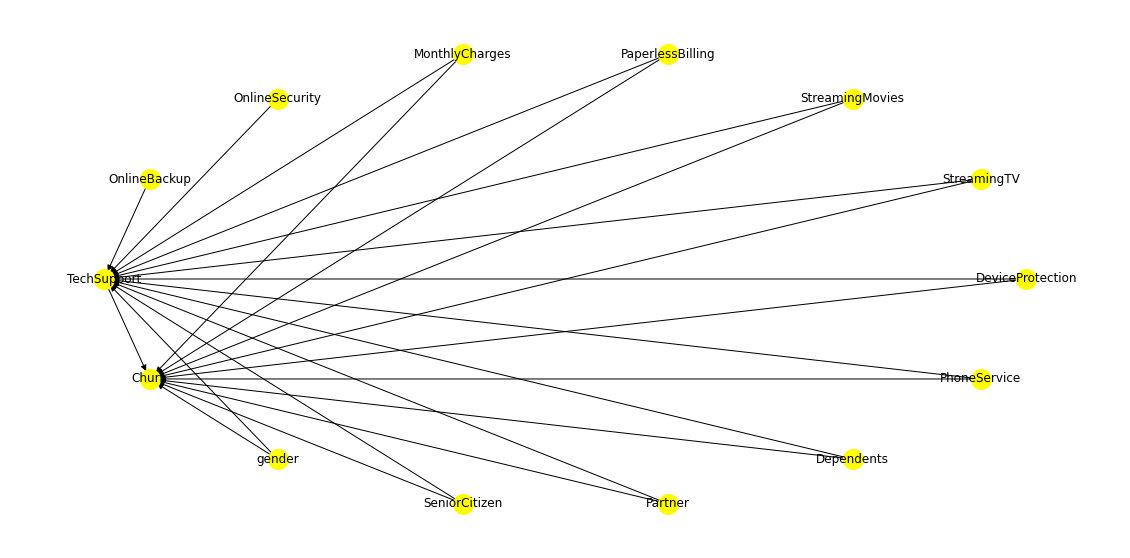

In [11]:
model.view_model(size=(20,10),layout='dot')

# 2. Identification 

In [12]:
# Identify if the causal inference problem is possible to solve and what are the available methods.
# This does not use any data and only use the graph.

identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
# The proceed_when_unidentifiable = True is to convey that we are ignoring any unobserved confounding.
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(Churn|PhoneService,StreamingTV,StreamingMovies,Pape
d[TechSupport]                                                                

                                                                              
rlessBilling,gender,DeviceProtection,SeniorCitizen,Partner,Dependents,MonthlyC
                                                                              

        
harges))
        
Estimand assumption 1, Unconfoundedness: If U→{TechSupport} and U→Churn then P(Churn|TechSupport,PhoneService,StreamingTV,StreamingMovies,PaperlessBilling,gender,DeviceProtection,SeniorCitizen,Partner,Dependents,MonthlyCharges,U) = P(Churn|TechSupport,PhoneService,StreamingTV,StreamingMovies,PaperlessBilling,gender,DeviceProtection,SeniorCitizen,Partner,Dependents,MonthlyCharges)

### Estimand : 2


# 3. Estimation

In [13]:
# As we can see three estimation methods are posible.
# We will choose the nonparameteric-average treatment effect.
# There are multiple estimation methods for this from econml library.
# We will use double machine learning (DML)

In [35]:
import econml
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
dml_estimate = model.estimate_effect(identified_estimand,
                                        method_name='backdoor.econml.dml.DML',
                                        method_params={
                                            'init_params':{'model_y':LogisticRegressionCV(),
                                                          'model_t':LogisticRegressionCV(),
                                                          'model_final':RandomForestClassifier()},
                                            'fit_params':{}
                                        })
print(dml_estimate)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(Churn|PhoneService,StreamingTV,StreamingMovies,Pape
d[TechSupport]                                                                

                                                                              
rlessBilling,gender,DeviceProtection,SeniorCitizen,Partner,Dependents,MonthlyC
                                                                              

        
harges))
        
Estimand assumption 1, Unconfoundedness: If U→{TechSupport} and U→Churn then P(Churn|TechSupport,PhoneService,StreamingTV,StreamingMovies,PaperlessBilling,gender,DeviceProtection,SeniorCitizen,Partner,Dependents,MonthlyCharges,U) = P(Churn|TechSupport,PhoneService,StreamingTV,StreamingMovies,PaperlessBilling,gender,DeviceProtection,SeniorCitizen,Partn

# 4. Refutation


In [ ]:
# Check the robustness of the estimate by administrating a test. This check the assumptions baked into the analysis.

## 4.1. Placebo test

In [ ]:
# Popular test: Placebo test
# In this test replace the treatement/action variable with random values. Then redo the analysis.
# We should get zero effect if this test is succesful. 

refute_results = model.refute_estimate(identified_estimand, dml_estimate,
                                          method_name='placebo_treatment_refuter')

In [ ]:
print(refute_results)

### The test is succesful! we have the new effect to be almost zero! We can trust this causal analysis. 

## 4.2. Random confounder

In [ ]:
# Another test is adding a random common cause varaibel
# The treatement effect should not be changed by addition of this random confounder.


In [ ]:
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause")
print(res_random)

### With a random confounder added the mean effect does not change by much. So we can say the causal analysis has passed this test too

## 4.3. Add unobserved common cause variable

In [ ]:
# Add a confounder that can affect both treatement and target in a linear way. 
# We can either control how much is the effect or let dowhy control it so that it is not
# bigger than already existing confounder effects.
res_unobserved_auto = model.refute_estimate(identified_estimand, dml_estimate,
                                           method_name='add_unobserved_common_cause',
                                           confounder_effect_on_treatment='binary_flip',
                                           confounder_effect_on_outcome='linear')

In [ ]:
print(res_unobserved_auto)

# The above test tell us the effect of treatement on the output is positive.

## 4.4. Removing a subset of data


In [ ]:
res_subset=model.refute_estimate(identified_estimand,  dml_estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

# Interperation 

In [24]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges
0,1,0,1,0,0,0,0,0,1,29.85
1,0,0,0,0,1,1,0,0,0,56.95
2,0,0,0,0,1,0,0,0,1,53.85
3,0,0,0,0,0,1,0,0,0,42.30
4,1,0,0,0,1,0,0,0,1,70.70


In [45]:
import shap
#from econml.dml import CausalForestDML

# fit causal forest with default parameters 
#causal_forest = CausalForestDML()
#causal_forest.fit(Y, T, X=X, W=None)

# calculate shap values of causal forest model
shap_values = dml_estimate.estimator.shap_values(X)
#shap_values = causal_forest.shap_values(X)
# plot shap values 
shap.summary_plot(shap_values['Churn']['TechSupport'])

ValueError: Found array with 0 feature(s) (shape=(5517, 0)) while a minimum of 1 is required.

In [15]:
import shap

In [16]:
data['df'][data['common_causes_names']].shape

In [17]:
X = data['df'][data['common_causes_names']]
Y = data['df'][data['outcome_name']]
T = data['df'][data['treatment_name']]

In [18]:
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV

# set parameters for causal forest 
causal_forest = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest.fit(Y, T, X=X, W=None)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

 98%|===================| 5404/5517 [00:45<00:00]        

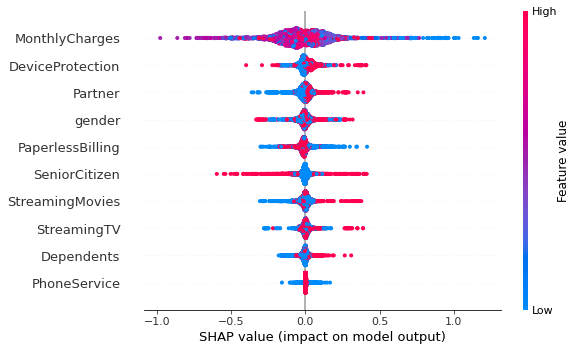

In [19]:
import shap
from econml.dml import CausalForestDML

# fit causal forest with default parameters 
causal_forest = CausalForestDML()
causal_forest.fit(Y, T, X=X, W=None)

# calculate shap values of causal forest model 
shap_values = causal_forest.shap_values(X)
# plot shap values 
shap.summary_plot(shap_values['Churn']['TechSupport'])

In [34]:
np.mean(causal_forest.const_marginal_effect(X[X['MonthlyCharges']>50]))